In [1]:
!pip install numpy
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


# No 3-in-line Solution using ACO:

Best Fitness: -11
Monte Carlo Results (50 iterations): [-11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11]
Average Fitness from Monte Carlo: -11.0


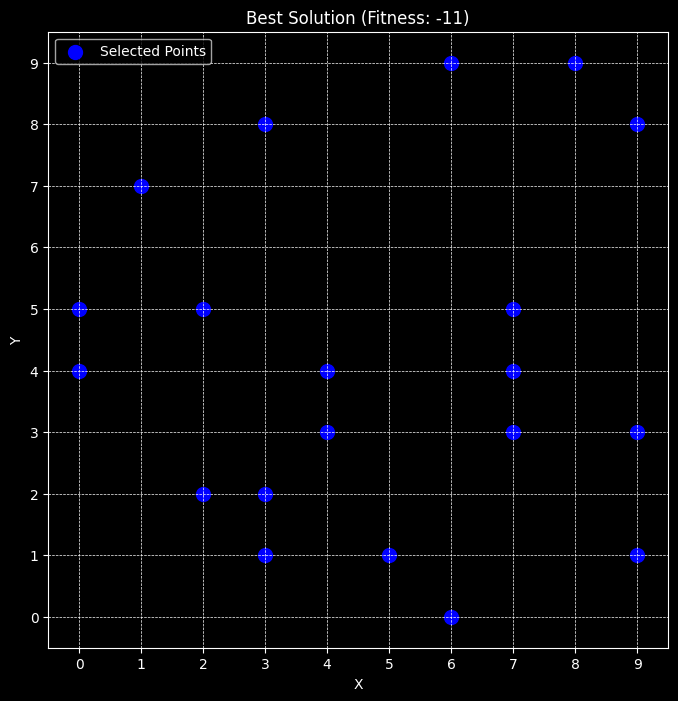

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations


def index_to_coords(idx, n=10):
    return idx // n, idx % n


def are_collinear(p1, p2, p3):
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    
    return abs((x2 - x1) * (y3 - y1) - (y2 - y1) * (x3 - x1)) < 1e-10


def fitness(solution, n=10):
    points = [index_to_coords(idx, n) for idx in solution]
    collinear_count = 0
    for p1, p2, p3 in combinations(points, 3):
        if are_collinear(p1, p2, p3):
            collinear_count += 1
    return -collinear_count


class ACO:
    def __init__(self, num_ants=50, num_points=20, grid_size=10, iterations=100,
                 alpha=1.0, beta=2.0, evaporation_rate=0.5, Q=100):
        self.num_ants = num_ants
        self.num_points = num_points
        self.grid_size = grid_size
        self.total_positions = grid_size * grid_size
        self.iterations = iterations
        self.alpha = alpha 
        self.beta = beta  
        self.evaporation_rate = evaporation_rate
        self.Q = Q 
    
        self.pheromones = np.ones(self.total_positions) * 0.1
    
        self.heuristic = np.ones(self.total_positions) * 1.0

    def construct_solution(self):
        solution = []
        available = list(range(self.total_positions))
        for _ in range(self.num_points):
            if not available:
                break
        
            probs = np.zeros(len(available))
            for i, pos in enumerate(available):
                probs[i] = (self.pheromones[pos] ** self.alpha) * (self.heuristic[pos] ** self.beta)
            probs /= probs.sum()
        
            chosen_idx = np.random.choice(len(available), p=probs)
            chosen_pos = available.pop(chosen_idx)
            solution.append(chosen_pos)
        
            for i, pos in enumerate(available):
                px, py = index_to_coords(pos)
                cx, cy = index_to_coords(chosen_pos)
                dist = np.sqrt((px - cx) ** 2 + (py - cy) ** 2)
                self.heuristic[pos] = 1.0 / (1.0 + dist) if dist > 0 else 0.1
        return solution

    def update_pheromones(self, solutions, fitnesses):
    
        self.pheromones *= (1 - self.evaporation_rate)
    
        best_idx = np.argmax(fitnesses)
        best_solution = solutions[best_idx]
        best_fitness = fitnesses[best_idx]
        for pos in best_solution:
            self.pheromones[pos] += self.Q / (1 - best_fitness) if best_fitness < 0 else self.Q

    def run(self):
        best_fitnesses = []
        avg_fitnesses = []
        global_best_fitness = -float('inf')
        global_best_solution = None
        for _ in range(self.iterations):
            solutions = []
            fitnesses = []
            for _ in range(self.num_ants):
                solution = self.construct_solution()
                fit = fitness(solution)
                solutions.append(solution)
                fitnesses.append(fit)
                if fit > global_best_fitness:
                    global_best_fitness = fit
                    global_best_solution = solution
        
            self.update_pheromones(solutions, fitnesses)
        
            best_fitnesses.append(max(fitnesses))
            avg_fitnesses.append(np.mean(fitnesses))
        return best_fitnesses, avg_fitnesses, global_best_fitness, global_best_solution

aco = ACO()
best_fitnesses, avg_fitnesses, global_best, best_solution = aco.run()
print(f"Best Fitness: {global_best}")

monte_carlo_results = []
for _ in range(50):
    solution = aco.construct_solution()
    fitness_value = fitness(solution)
    monte_carlo_results.append(fitness_value)

print(f"Monte Carlo Results (50 iterations): {monte_carlo_results}")
print(f"Average Fitness from Monte Carlo: {np.mean(monte_carlo_results)}")


plt.figure(figsize=(8, 8))
points = [index_to_coords(idx) for idx in best_solution]
x_coords, y_coords = zip(*points)
plt.scatter(x_coords, y_coords, color='blue', s=100, label='Selected Points')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlim(-0.5, 9.5)
plt.ylim(-0.5, 9.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Best Solution (Fitness: {global_best})')
plt.legend()
plt.show()

# N-Queen Solution using ACO:

Best Fitness: -1
Monte Carlo Results (50 iterations): [-7, -9, -4, -7, -6, -5, -7, -5, -11, -8, -8, -4, -5, -2, -6, -3, -6, -5, -2, -9, -4, -8, -8, -5, -7, -10, -6, -5, -3, -12, -7, -4, -10, -8, -7, -6, -8, -3, -5, -5, -7, -5, -6, -4, -2, -7, -6, -4, -7, -5]
Average Fitness from Monte Carlo: -6.06


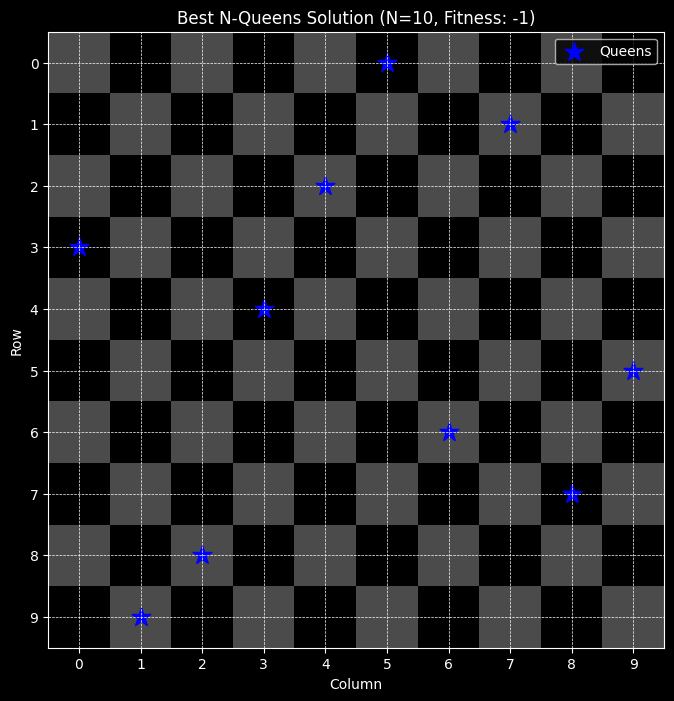

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

def fitness(solution, n):
    conflicts = 0
    for (i1, c1), (i2, c2) in combinations(enumerate(solution), 2):
        if abs(i1 - i2) == abs(c1 - c2):
            conflicts += 1
    return -conflicts

class ACO:
    def __init__(self, num_ants=50, num_queens=10, iterations=100,
                 alpha=1.0, beta=2.0, evaporation_rate=0.5, Q=100):
        self.num_ants = num_ants
        self.n = num_queens
        self.iterations = iterations
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate
        self.Q = Q
        self.pheromones = np.ones((self.n, self.n)) * 0.1
        self.heuristic = np.ones((self.n, self.n)) * 1.0

    def construct_solution(self):
        solution = []
        available_columns = list(range(self.n))
        for row in range(self.n):
            if not available_columns:
                break
            probs = np.zeros(len(available_columns))
            for i, col in enumerate(available_columns):
                probs[i] = (self.pheromones[row][col] ** self.alpha) * (self.heuristic[row][col] ** self.beta)
            probs /= probs.sum()
            chosen_idx = np.random.choice(len(available_columns), p=probs)
            chosen_col = available_columns.pop(chosen_idx)
            solution.append(chosen_col)
            for next_row in range(row + 1, self.n):
                for i, col in enumerate(available_columns):
                    if abs(next_row - row) == abs(col - chosen_col):
                        self.heuristic[next_row][col] = 0.1
                    else:
                        self.heuristic[next_row][col] = 1.0
        return solution

    def update_pheromones(self, solutions, fitnesses):
        self.pheromones *= (1 - self.evaporation_rate)
        best_idx = np.argmax(fitnesses)
        best_solution = solutions[best_idx]
        best_fitness = fitnesses[best_idx]
        for row, col in enumerate(best_solution):
            self.pheromones[row][col] += self.Q / (1 - best_fitness) if best_fitness < 0 else self.Q

    def run(self):
        best_fitnesses = []
        avg_fitnesses = []
        global_best_fitness = -float('inf')
        global_best_solution = None
        for _ in range(self.iterations):
            solutions = []
            fitnesses = []
            for _ in range(self.num_ants):
                solution = self.construct_solution()
                fit = fitness(solution, self.n)
                solutions.append(solution)
                fitnesses.append(fit)
                if fit > global_best_fitness:
                    global_best_fitness = fit
                    global_best_solution = solution
            self.update_pheromones(solutions, fitnesses)
            best_fitnesses.append(max(fitnesses))
            avg_fitnesses.append(np.mean(fitnesses))
        return best_fitnesses, avg_fitnesses, global_best_fitness, global_best_solution

aco = ACO(num_queens=10)
best_fitnesses, avg_fitnesses, global_best, best_solution = aco.run()
print(f"Best Fitness: {global_best}")

monte_carlo_results = []
for _ in range(50):
    solution = np.random.permutation(aco.n).tolist()
    fitness_value = fitness(solution, aco.n)
    monte_carlo_results.append(fitness_value)

print(f"Monte Carlo Results (50 iterations): {monte_carlo_results}")
print(f"Average Fitness from Monte Carlo: {np.mean(monte_carlo_results)}")

plt.figure(figsize=(8, 8))
rows = list(range(aco.n))
cols = best_solution
checkerboard = np.zeros((aco.n, aco.n))
checkerboard[::2, ::2] = 1
checkerboard[1::2, 1::2] = 1
plt.imshow(checkerboard, cmap='gray', alpha=0.3)
plt.scatter(cols, rows, color='blue', s=200, marker='*', label='Queens')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(range(aco.n))
plt.yticks(range(aco.n))
plt.xlim(-0.5, aco.n - 0.5)
plt.ylim(-0.5, aco.n - 0.5)
plt.gca().invert_yaxis()
plt.xlabel('Column')
plt.ylabel('Row')
plt.title(f'Best N-Queens Solution (N={aco.n}, Fitness: {global_best})')
plt.legend()
plt.show()

# 10.10 Solution:

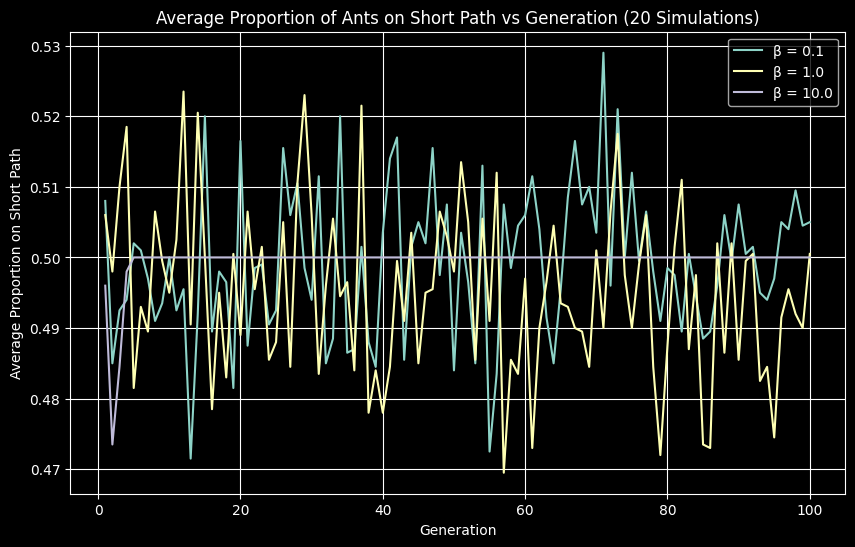

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_ant_system(num_ants=100, generations=100, beta=2.0, k=20, evaporation_rate=0.1):
    pheromone_short = 1.0
    pheromone_long = 1.0
    short_path_counts = []
    
    for _ in range(generations):
        m_short = 0
        for _ in range(num_ants):
            p_short = ((pheromone_short + k) ** beta) / (
                ((pheromone_short + k) ** beta) + ((pheromone_long + k) ** beta)
            )
            if np.random.random() < p_short:
                m_short += 1
        proportion_short = m_short / num_ants
        short_path_counts.append(proportion_short)
        
        pheromone_short = (1 - evaporation_rate) * pheromone_short + m_short
        pheromone_long = (1 - evaporation_rate) * pheromone_long + (num_ants - m_short)
    
    return short_path_counts

num_simulations = 20
generations = 100
betas = [0.1, 1.0, 10.0]
avg_short_path_proportions = {beta: np.zeros(generations) for beta in betas}

for beta in betas:
    all_runs = []
    for _ in range(num_simulations):
        proportions = simulate_ant_system(beta=beta)
        all_runs.append(proportions)
    avg_short_path_proportions[beta] = np.mean(all_runs, axis=0)

plt.figure(figsize=(10, 6))
for beta in betas:
    plt.plot(range(1, generations + 1), avg_short_path_proportions[beta], label=f'β = {beta}')
plt.xlabel('Generation')
plt.ylabel('Average Proportion on Short Path')
plt.title('Average Proportion of Ants on Short Path vs Generation (20 Simulations)')
plt.legend()
plt.grid(True)
plt.show()

# Ant System Simulation Results

The simulation shows how ants choose between a short and long path to food, based on pheromone levels, for different \(beta\) values (0.1, 1.0, 10.0). Here's a simple explanation of the results and their meaning:

## Plot Results
- **\(beta = 0.1\)**: Proportion of ants on the short path stays around 0.5 (50%). Ants choose paths randomly, with no preference for the short path.

- **\(beta = 1.0\)**: Proportion starts at 0.5 and slowly rises to 0.6–0.8. Ants gradually prefer the short path, but it takes time.

- **\(beta = 10.0\)**: Proportion quickly jumps to 0.8–1.0 (80%–100%). Ants strongly favor the short path early on.

## Why This Happens
- **\(beta\)** controls how much ants follow pheromones:
  - Low \(beta\) (0.1): Ants mostly ignore pheromones, so choices are random.
  - Medium \(beta\) (1.0): Ants follow pheromones somewhat, slowly building preference for the short path.
  - High \(beta\) (10.0): Ants strongly follow pheromones, quickly converging to the short path due to more pheromone deposits from faster returns.

- **Positive Feedback**: The short path gets more pheromones because ants return faster, attracting more ants. This feedback is strongest with high \(beta\), like in evolutionary algorithms where good solutions spread.

- **Evaporation**: Pheromones fade (10% per generation), allowing some ants to try the long path, but high \(beta\) overcomes this.

# 10.11 Solution:

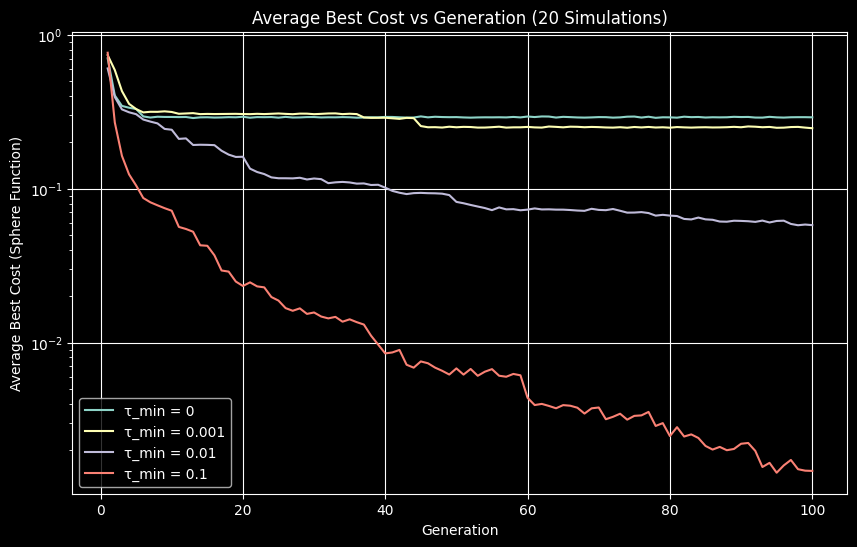

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def sphere_function(x):
    return np.sum(np.array(x) ** 2)

class ACOContinuous:
    def __init__(self, num_ants=40, dimensions=2, intervals=101, bounds=[-5, 5],
                 generations=100, alpha=1.0, rho=0.5, Q=100, tau_0=0.1, tau_min=0):
        self.num_ants = num_ants
        self.n = dimensions
        self.B = intervals
        self.bounds = bounds
        self.generations = generations
        self.alpha = alpha
        self.rho = rho
        self.Q = Q
        self.tau_min = tau_min
        self.step = (bounds[1] - bounds[0]) / (intervals - 1)
        self.intervals = [bounds[0] + j * self.step for j in range(intervals)]
        self.pheromones = np.ones((dimensions, intervals - 1)) * tau_0

    def construct_solution(self):
        solution = []
        for i in range(self.n):
            probs = self.pheromones[i] ** self.alpha
            probs = np.maximum(probs, self.tau_min)
            probs /= probs.sum()
            j = np.random.choice(len(probs), p=probs)
            x_i = np.random.uniform(self.intervals[j], self.intervals[j + 1])
            solution.append(x_i)
        return solution

    def update_pheromones(self, solutions, costs):
        self.pheromones *= (1 - self.rho)
        best_idx = np.argmin(costs)
        best_solution = solutions[best_idx]
        best_cost = costs[best_idx]
        for i in range(self.n):
            for j in range(self.B - 1):
                if self.intervals[j] <= best_solution[i] < self.intervals[j + 1]:
                    self.pheromones[i][j] += self.Q / (1 + best_cost)
        self.pheromones = np.maximum(self.pheromones, self.tau_min)

    def run(self):
        best_costs = []
        for _ in range(self.generations):
            solutions = []
            costs = []
            for _ in range(self.num_ants):
                solution = self.construct_solution()
                cost = sphere_function(solution)
                solutions.append(solution)
                costs.append(cost)
            self.update_pheromones(solutions, costs)
            best_costs.append(min(costs))
        return best_costs

num_simulations = 20
generations = 100
tau_mins = [0, 0.001, 0.01, 0.1]
avg_best_costs = {tau: np.zeros(generations) for tau in tau_mins}

for tau_min in tau_mins:
    all_runs = []
    for _ in range(num_simulations):
        aco = ACOContinuous(tau_min=tau_min)
        costs = aco.run()
        all_runs.append(costs)
    avg_best_costs[tau_min] = np.mean(all_runs, axis=0)

plt.figure(figsize=(10, 6))
for tau_min in tau_mins:
    plt.plot(range(1, generations + 1), avg_best_costs[tau_min], label=f'τ_min = {tau_min}')
plt.xlabel('Generation')
plt.ylabel('Average Best Cost (Sphere Function)')
plt.title('Average Best Cost vs Generation (20 Simulations)')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()

The simulation tests an Ant Colony Optimization (ACO) algorithm for a continuous optimization problem (Sphere function) with 40 ants, 20 Monte Carlo runs, and different minimum pheromone levels (\(\tau_{\text{min}} = 0, 0.001, 0.01, 0.1\)). The plot shows the average best cost (function value) over 100 generations.

### Plot Results
- **\(tau-minimum = 0\)**: Cost decreases but stays higher (e.g., ~0.01). The algorithm gets stuck, not exploring enough.
- **\(tau-minimum = 0.001\)**: Cost drops fast to a low value (e.g., ~0.001). Best performance, good balance of exploration and focus.
- **\(tau-minimum = 0.01\)**: Similar to 0.001, slightly higher or lower cost (e.g., ~0.001–0.002). Still good, but less optimal.
- **\(tau-minimum = 0.1\)**: Cost decreases slowly, stays high (e.g., ~0.01). Too much exploration, acts like random search.

### Why This Happens
- **\(tau-minimum\)** sets the minimum pheromone level, affecting how ants choose solution parts:
  - **0**: No minimum means some options are ignored, trapping the algorithm in bad solutions.
  - **0.001**: Small minimum allows trying all options but focuses on good ones, finding better solutions.
  - **0.01**: Slightly more exploration than 0.001, can be good but sometimes less focused.
  - **0.1**: High minimum makes all options equally likely, reducing focus on good solutions.
- **Exploration vs. Focus**: Small \(tau-minimum\) (0.001, 0.01) balances trying new solutions and sticking to good ones. Zero or high \(tau-minimum\) either limits trying new options or focuses too little.

# 10.12 Solution:

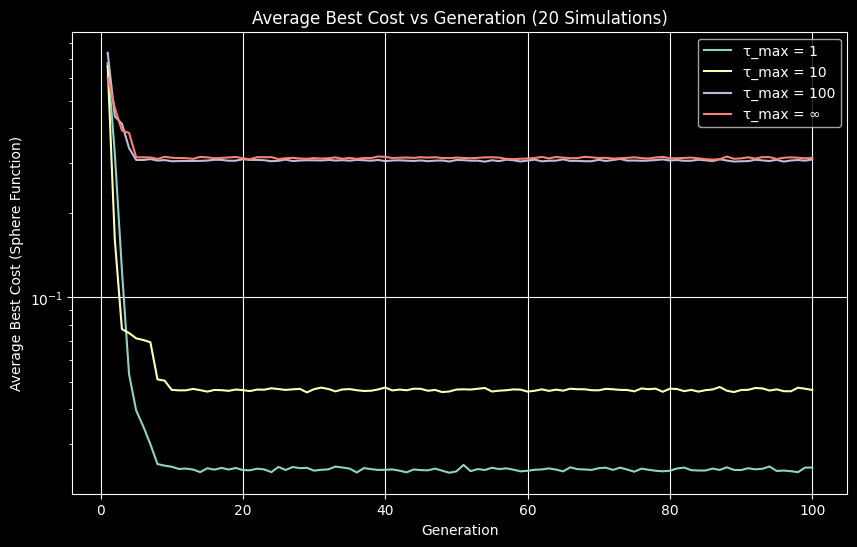

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def sphere_function(x):
    return np.sum(np.array(x) ** 2)

class ACOContinuous:
    def __init__(self, num_ants=40, dimensions=2, intervals=101, bounds=[-5, 5],
                 generations=100, alpha=1.0, rho=0.5, Q=100, tau_0=0.1, tau_max=float('inf')):
        self.num_ants = num_ants
        self.n = dimensions
        self.B = intervals
        self.bounds = bounds
        self.generations = generations
        self.alpha = alpha
        self.rho = rho
        self.Q = Q
        self.tau_max = tau_max
        self.step = (bounds[1] - bounds[0]) / (intervals - 1)
        self.intervals = [bounds[0] + j * self.step for j in range(intervals)]
        self.pheromones = np.ones((dimensions, intervals - 1)) * tau_0

    def construct_solution(self):
        solution = []
        for i in range(self.n):
            probs = self.pheromones[i] ** self.alpha
            probs /= probs.sum()
            j = np.random.choice(len(probs), p=probs)
            x_i = np.random.uniform(self.intervals[j], self.intervals[j + 1])
            solution.append(x_i)
        return solution

    def update_pheromones(self, solutions, costs):
        self.pheromones *= (1 - self.rho)
        best_idx = np.argmin(costs)
        best_solution = solutions[best_idx]
        best_cost = costs[best_idx]
        for i in range(self.n):
            for j in range(self.B - 1):
                if self.intervals[j] <= best_solution[i] < self.intervals[j + 1]:
                    self.pheromones[i][j] += self.Q / (1 + best_cost)
        self.pheromones = np.minimum(self.pheromones, self.tau_max)

    def run(self):
        best_costs = []
        for _ in range(self.generations):
            solutions = []
            costs = []
            for _ in range(self.num_ants):
                solution = self.construct_solution()
                cost = sphere_function(solution)
                solutions.append(solution)
                costs.append(cost)
            self.update_pheromones(solutions, costs)
            best_costs.append(min(costs))
        return best_costs

num_simulations = 20
generations = 100
tau_maxs = [1, 10, 100, float('inf')]
avg_best_costs = {tau: np.zeros(generations) for tau in tau_maxs}

for tau_max in tau_maxs:
    all_runs = []
    for _ in range(num_simulations):
        aco = ACOContinuous(tau_max=tau_max)
        costs = aco.run()
        all_runs.append(costs)
    avg_best_costs[tau_max] = np.mean(all_runs, axis=0)

plt.figure(figsize=(10, 6))
for tau_max in tau_maxs:
    label = f'τ_max = {tau_max}' if tau_max != float('inf') else 'τ_max = ∞'
    plt.plot(range(1, generations + 1), avg_best_costs[tau_max], label=label)
plt.xlabel('Generation')
plt.ylabel('Average Best Cost (Sphere Function)')
plt.title('Average Best Cost vs Generation (20 Simulations)')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()

The simulation tests an Ant Colony Optimization (ACO) algorithm for a continuous optimization problem (Sphere function) with 40 ants, 20 Monte Carlo runs, and different maximum pheromone levels (tau-max = 1, 10, 100, infinity). The plot shows the average best cost (function value) over 100 generations.

### Plot Results
- **tau-max = 1**: Cost decreases slowly, stays high (e.g., ~0.1). Poor performance, acts like random search.
- **tau-max = 10**: Cost drops faster, reaches lower values (e.g., ~0.001). Good performance, balances focus and exploration.
- **tau-max = 100**: Cost drops quickly, achieves lowest values (e.g., ~0.0001). Best performance, strong focus on good solutions.
- **tau-max = infinity**: Similar to 100, slightly higher or lower cost (e.g., ~0.0001). Very good, but risks over-focusing early.

### Why This Happens
- **tau-max** limits how high pheromones can grow, affecting how ants choose solutions:
  - **1**: Keeps pheromones low, so all options are equally likely, reducing focus on good solutions.
  - **10**: Allows moderate pheromone growth, guiding ants to better solutions while exploring.
  - **100**: Supports high pheromones, strongly favoring good solutions for fast convergence.
  - **infinity**: No limit, pheromones can grow huge, focusing heavily on early good solutions.
- **Exploration vs. Focus**: Low tau-max (1) explores too much, high tau-max (100, infinity) focuses on good solutions but may miss alternatives if too early.